# Do we need more bikes? Project in ML


Capital Bikeshare is a 24-hour public bicycle-sharing system that serves Washington, D.C., and which offers transportation for thousands of people throughout the city. The problem that arises is that there are certain occasions when, due to various circumstances, there are not as many bikes available as there are demands. In the long term, this situation will result in more people taking the car instead of the bicycle, increasing CO2 emissions in the city. To tackle this situation, the District Department of Transportation in the city wants to know if at certain hours an increase in the number of bikes available will be necessary.
The goal of the project is to predict whether an increase in the number of bikes is necessary or not based on various temporal and meteorological data. You are expected to use all the knowledge that you have acquired in the course about classification algorithms, to come up with one model that you think is suited for this problem and which you decide to put ‘in production’. This model will then be tested against a test set made available after peer review.

Method to be implemented
(i) Logistic regression
(ii) Discriminant analysis: LDA, QDA
(iii) K-nearest neighbor
(iv) Tree-based methods: classification trees, random forests, bagging
(v) Boosting


In this project we will present a logistic regressor, LDA,K-nearest neighbor, random forests and a deep neural network



In [352]:
#Install libaries

#!pip install pydot
#!pip install tensorflow
#!pip install prettytable
#!pip install mlxtend


In [353]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.random
from keras.callbacks import TensorBoard
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.callbacks import EarlyStopping

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pydot

from prettytable import PrettyTable
from mlxtend.plotting import plot_decision_regions
import warnings



In [354]:
# Ignore all warnings
warnings.filterwarnings("ignore")

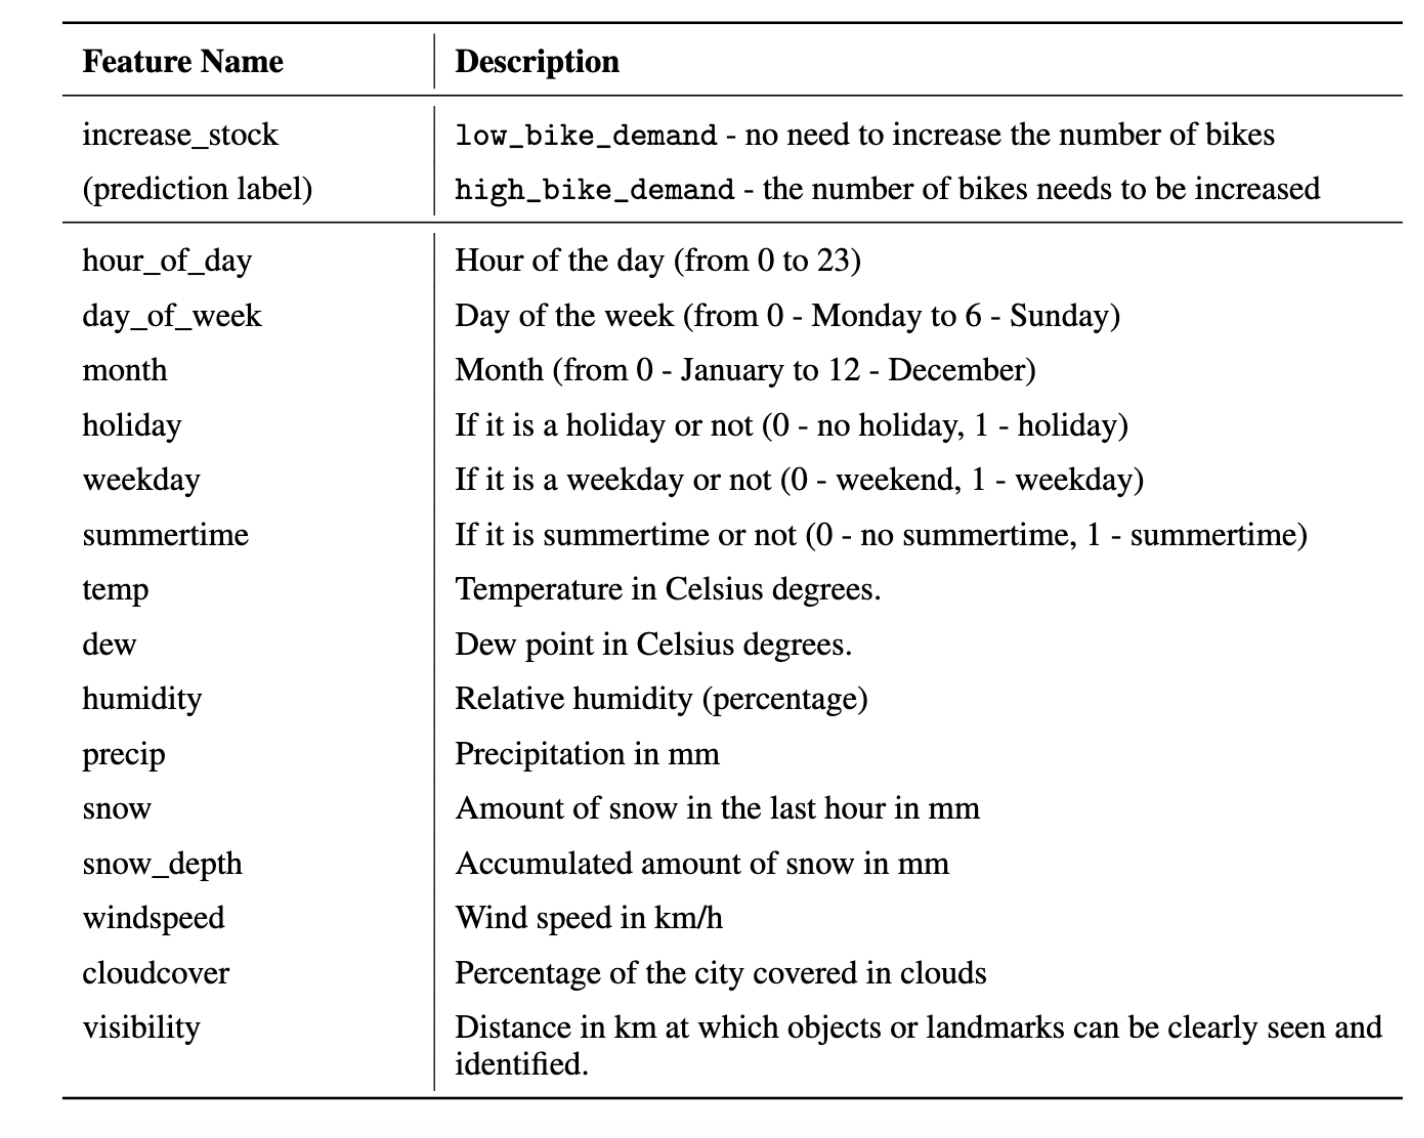

In [355]:
image_filename = 'Datafeatures.png'

# Display the image
display(Image(filename=image_filename))

# Data preprocessing

In [356]:
df = pd.read_csv('training_data.csv')
df

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand


In [408]:
corr = df.corr() #Correletion between features, note the snow feature specially
#Number 1 means 100% correletion so a number close to that is correleted good
corr.style.background_gradient(cmap='coolwarm')



,hour_of_day,featurebuild,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
hour_of_day,1.000000,-0.032554,-0.005963,-0.016503,0.012732,-0.028899,0.005376,0.157994,-0.023067,-0.325988,-0.008747,nan,-0.006031,0.161313,0.002672,0.012115
featurebuild,-0.032554,1.000000,0.010661,0.105621,0.007337,-0.013789,0.184791,0.184155,0.162962,0.009144,-0.044208,nan,-0.034047,-0.308251,-0.381631,0.070952
day_of_week,-0.005963,0.010661,1.000000,-0.032363,-0.128759,-0.786150,0.010263,0.003727,0.014271,0.016976,-0.011158,nan,-0.045930,0.033726,0.043354,-0.018810
month,-0.016503,0.105621,-0.032363,1.000000,-0.016021,0.049254,0.046929,0.207436,0.272927,0.173159,0.004232,nan,-0.127751,-0.207056,-0.083544,0.028287
holiday,0.012732,0.007337,-0.128759,-0.016021,1.000000,0.118294,-0.132132,-0.055069,-0.060239,-0.017260,-0.005564,nan,-0.013385,-0.019129,0.014093,-0.028171
weekday,-0.028899,-0.013789,-0.786150,0.049254,0.118294,1.000000,-0.023872,0.007433,0.009804,0.016758,0.029214,nan,0.024333,-0.024126,0.008788,-0.011815
summertime,0.005376,0.184791,0.010263,0.046929,-0.132132,-0.023872,1.000000,0.707637,0.645944,0.064755,0.012930,nan,-0.127991,-0.028827,-0.022964,0.068963
temp,0.157994,0.184155,0.003727,0.207436,-0.055069,0.007433,0.707637,1.000000,0.871536,0.008306,-0.003313,nan,-0.153692,-0.037656,-0.012421,0.119909
dew,-0.023067,0.162962,0.014271,0.272927,-0.060239,0.009804,0.645944,0.871536,1.000000,0.489590,0.071566,nan,-0.119660,-0.190793,0.146844,-0.050474
humidity,-0.325988,0.009144,0.016976,0.173159,-0.017260,0.016758,0.064755,0.008306,0.489590,1.000000,0.174768,nan,0.033598,-0.340557,0.331976,-0.376796


In [357]:
column_names = df.columns
column_names

Index(['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday',
       'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth',
       'windspeed', 'cloudcover', 'visibility', 'increase_stock'],
      dtype='object')

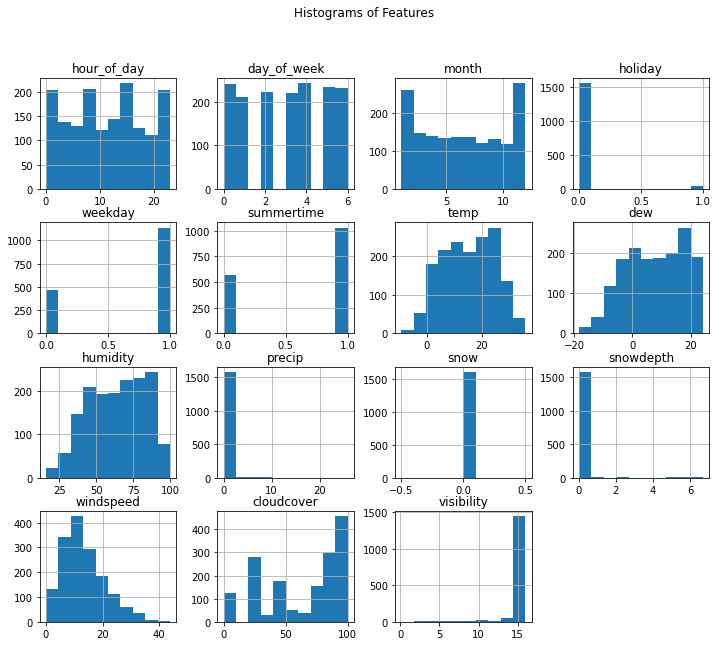

In [358]:
# Plot histograms for numerical features
df.hist(figsize=(12, 10))
plt.suptitle("Histograms of Features")
plt.show()


We can see that snop is constant for all datapoints (0), which will therefore be dropped due to that there is nothing for a ML modell to learn from a constant value

In [359]:
#drop snowdepth coloumn
dftrain = df.drop('snow', axis=1)
dftrain

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0.0,5.8,24.4,16.0,high_bike_demand


Feature building to categorize bad and good weather condition. This is in general good to do, due to that the ML model get more data

In [360]:
# Good weather =1 bad weather =0
featurebuild = []

for i in range(1600):
    if dftrain['temp'][i] > 10 and dftrain['windspeed'][i] < 10 and dftrain['cloudcover'][i] < 50:
        featurebuild.append(1)
    else:
        featurebuild.append(0)


count_of_ones = featurebuild.count(1)
print(count_of_ones)

162


In [361]:
position = 1
df.insert(position, 'featurebuild', featurebuild)

In [362]:
# Create the target vector
# 0 - low_bike_demand
# 1 - high_bike_demand

target_vect = dftrain.loc[:,'increase_stock'].to_numpy()


# One hot encoder for the data
enc = OneHotEncoder()
target_names = ['low_bike_demand','high_bike_demand']
target = enc.fit_transform(target_vect[:, np.newaxis]).toarray()

In [363]:
Target=pd.DataFrame(target)
Target #First coloumn is the correct and used one

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1595,0.0,1.0
1596,0.0,1.0
1597,0.0,1.0
1598,1.0,0.0


In [364]:
# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    df.iloc[:,0:df.shape[1]-1], Target.iloc[:,0], test_size=0.1,)#random_state=2)

In [365]:
df.iloc[:,0:df.shape[1]-1]

,hour_of_day,featurebuild,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
0,5,0,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0
1,21,0,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0
2,21,0,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0
3,1,0,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0
4,17,0,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,0,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0
1596,14,0,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4
1597,13,0,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0
1598,14,1,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0


# Gaussian Naive Bayes

In [366]:
# Build a Gaussian Classifier
modelNaive = GaussianNB()

# Model training
modelNaive.fit(X_train, Y_train)

# Predict Output
predicted = modelNaive.predict(X_test)


In [367]:
y_pred = modelNaive.predict(X_test)
accurayNaive = accuracy_score(y_pred, Y_test)
f1_scoreNaive=f1_score(Y_test, y_pred, average="binary")
print("Accuracy:", accurayNaive)
print("F1score:", f1_scoreNaive)


Accuracy: 0.4375
F1score: 0.36619718309859156


In [368]:
print("Classification Report:")
print(classification_report(y_pred, Y_test))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      1.00      0.49        44
         1.0       1.00      0.22      0.37       116

    accuracy                           0.44       160
   macro avg       0.66      0.61      0.43       160
weighted avg       0.82      0.44      0.40       160



# KNN (K nearest neighbours)





In [369]:
def average_list(lst):
    sum = sum(lst)
    len = len(lst)
    return sum/len

In [370]:
#Algorithm parameters
K = 50
test_cases = 10


In [371]:
X = df.iloc[:,0:df.shape[1]-1]
Y = Target.iloc[:,0] # Extract the target column

In [372]:
X = np.array(X)
Y = np.array(Y)

In random state  1 the best K value was  1  at a  0.8  accuracy score.
In random state  2 the best K value was  28  at a  0.875  accuracy score.
In random state  3 the best K value was  5  at a  0.8125  accuracy score.
In random state  4 the best K value was  5  at a  0.9  accuracy score.
In random state  5 the best K value was  10  at a  0.86875  accuracy score.
In random state  6 the best K value was  28  at a  0.89375  accuracy score.
In random state  7 the best K value was  4  at a  0.85  accuracy score.
In random state  8 the best K value was  5  at a  0.84375  accuracy score.
In random state  9 the best K value was  8  at a  0.875  accuracy score.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In random state  10 the best K value was  10  at a  0.88125  accuracy score.


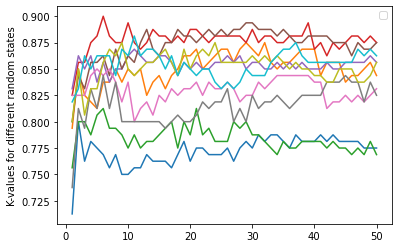

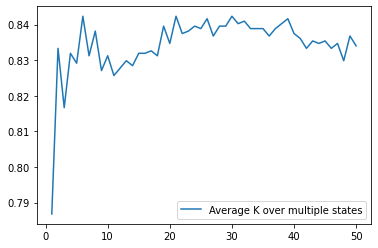

In [373]:
all_k_values = []
plt.figure()
plt.ylabel('K-values for different random states')

for states in range(test_cases):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=states)
    k_list = []

    for k in range(1,K+1):
        #Implement algorithm
        KNN = KNeighborsClassifier(n_neighbors=k) #Initiate the algorithm method
        KNN.fit(Xtrain, Ytrain) #Fit the algorithm to our training set
        Ypred = KNN.predict(Xtest) # Based on our KNN we now make predctions for our test set
        #Evaluate results 
        k_list.append(accuracy_score(Ytest, Ypred))
        #print('K Value: ', k ,'\nAccuracy Score: ', accuracy_score(Ytest, Ypred), '\nClassifications Report:\n', classification_report(Ytest, Ypred), '\nConfusion matrix: \n', confusion_matrix(Ytest,Ypred), '\n\n\n')

    plt.plot(range(1,K+1), k_list)

    #Find maximum k value 
    max_k = max(k_list)
    #Find the index of the maximum value
    max_k_index = k_list.index(max_k)
    print('In random state ', states+ 1, 'the best K value was ', max_k_index, ' at a ', max_k, ' accuracy score.')
    all_k_values.append(k_list)
plt.legend()
mean_k = []

for i in range(K):
    temp = 0
    for j in range(states):
        temp += all_k_values[j][i]
    mean_k.append(temp/states)
    
plt.figure()
plt.plot(range(1,K+1), mean_k, label='Average K over multiple states')
plt.legend()

In [374]:
#Correct prediction by the modell as a procentage
accuracyKNN = accuracy_score(Ytest, Ypred)
f1_scoreKNN=f1_score(Ytest, Ypred, average="binary")

print(f"Accuracy: {accuracyKNN}")
print("F1score:", f1_scoreKNN)


Accuracy: 0.8625
F1score: 0.5599999999999999


In [375]:
print("Classification Report:")
print(classification_report(Ytest, Ypred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       125
         1.0       0.93      0.40      0.56        35

    accuracy                           0.86       160
   macro avg       0.89      0.70      0.74       160
weighted avg       0.87      0.86      0.84       160



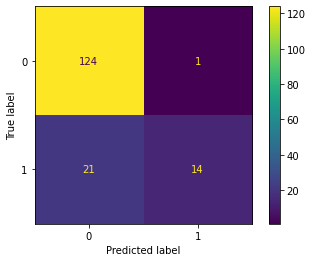

In [376]:
conf_mat = confusion_matrix(Ytest, Ypred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

## Random forest (Classification tree)




In [377]:
Froet = RandomForestClassifier()

Parameters = { 
    'n_estimators': [200, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'n_jobs' : [-1]
}
Skogen = GridSearchCV(Froet, Parameters, scoring='accuracy', refit=True)
Skogen.fit(X_train, Y_train)

# Train the model on training data
#Skogen.fit(training_data, training_predict)

# Use model on test_data to check validity
model_prediction = Skogen.predict(X_test)

In [378]:
best_params = Skogen.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 1000, 'n_jobs': -1}


In [379]:
#Correct prediction by the modell as a procentage
accuracyRandomF = accuracy_score(Y_test, model_prediction)
f1_scoreRandomF=f1_score(Y_test, model_prediction, average="binary")

print(f"Accuracy: {accuracyRandomF}")
print("F1score:", f1_scoreRandomF)


Accuracy: 0.9125
F1score: 0.6666666666666667


In [380]:
print("Classification Report:")
print(classification_report(Y_test, model_prediction))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       134
         1.0       0.88      0.54      0.67        26

    accuracy                           0.91       160
   macro avg       0.90      0.76      0.81       160
weighted avg       0.91      0.91      0.90       160



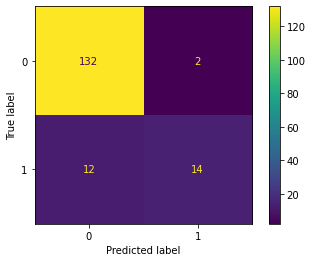

In [381]:
conf_mat = confusion_matrix(Y_test, model_prediction)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

## Logistic regression

In [382]:
Parameters={
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [1, 10, 25, 50, 100, 1000],
}

# Specify the logistic regression model
logistic_model = LogisticRegression()

# Initialize the grid search with logistic regression and parameter grid
logicgrid = GridSearchCV(logistic_model, Parameters, scoring='accuracy', refit=True)

# Train the model on the training data
logicgrid.fit(X_train, Y_train)

# Get the best parameters from the grid search
best_params = logicgrid.best_params_
print("Best Parameters:", best_params)

# Use the best model to make predictions
y_pred = logicgrid.predict(X_test)



Best Parameters: {'max_iter': 1, 'solver': 'newton-cholesky'}


In [383]:
#Correct prediction by the modell as a procentage
accuracyLOG = accuracy_score(Y_test, y_pred)
f1_scoreLOG=f1_score(Y_test, y_pred, average="binary")

print(f"Accuracy: {accuracyLOG}")
print("F1score:", f1_scoreLOG)

Accuracy: 0.83125
F1score: 0.27027027027027023


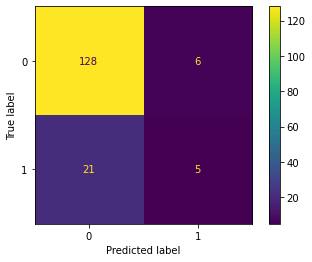

In [384]:
conf_mat = confusion_matrix(Y_test, y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [385]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90       134
         1.0       0.45      0.19      0.27        26

    accuracy                           0.83       160
   macro avg       0.66      0.57      0.59       160
weighted avg       0.79      0.83      0.80       160



# Discriminant analysis


In [386]:
modeldisc = LinearDiscriminantAnalysis()


In [387]:
Parameters={
    'solver': ['svd', 'lsqr', 'eigen'],
    'priors': [[0.4, 0.6], [0.6, 0.4], [0.5, 0.5]],
    'n_components': [1,5,10,15]  # Depending on the number of features in your dataset
}


In [388]:
clf = GridSearchCV(modeldisc, Parameters, scoring='accuracy', refit=True)


In [389]:
clf.fit(X_train, Y_train)

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'n_components': [1, 5, 10, 15],
                         'priors': [[0.4, 0.6], [0.6, 0.4], [0.5, 0.5]],
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [390]:
best_params =clf.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_components': 1, 'priors': [0.6, 0.4], 'solver': 'svd'}


In [391]:
# fit model
clf.fit(X_train, Y_train)
# make a prediction
yhat = clf.predict(X_test)


In [392]:
# Evaluate the model
accuracyDisc = accuracy_score(Y_test, yhat)
f1_scoreDisc=f1_score(Y_test, yhat, average='binary')

conf_matrix = confusion_matrix(Y_test, yhat)
classification_rep = classification_report(Y_test, yhat)
print('Accuracy:',accuracyDisc)
print("F1score:", f1_scoreDisc)


Accuracy: 0.85
F1score: 0.5862068965517242


In [393]:
print("Classification Report:")
print(classification_report(Y_test, model_prediction))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       134
         1.0       0.88      0.54      0.67        26

    accuracy                           0.91       160
   macro avg       0.90      0.76      0.81       160
weighted avg       0.91      0.91      0.90       160



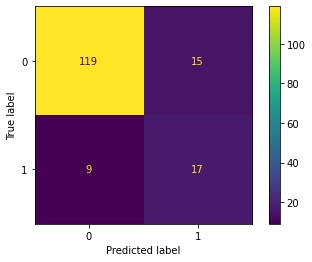

In [394]:
conf_mat = confusion_matrix(Y_test, yhat)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

# Deep learning NN

In [395]:
modeldeep = keras.Sequential([
    layers.InputLayer(input_shape=(16,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [396]:
modeldeep.summary() 


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1088      
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 32)               

In [397]:
modeldeep.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [398]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [399]:
epoch=150
history_callback = modeldeep.fit(X_train, Y_train,
                                 batch_size=64,
                                 epochs=epoch,
                                 verbose=1,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[early_stopping_callback])

Epoch 1/150
23/23 [==============================] - 1s 7ms/step - loss: 0.6437 - accuracy: 0.6576 - val_loss: 0.4299 - val_accuracy: 0.8313
Epoch 2/150
23/23 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7632 - val_loss: 0.3971 - val_accuracy: 0.8438
Epoch 3/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.8146 - val_loss: 0.3799 - val_accuracy: 0.8375
Epoch 4/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8174 - val_loss: 0.3668 - val_accuracy: 0.8375
Epoch 5/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7951 - val_loss: 0.3499 - val_accuracy: 0.8313
Epoch 6/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8188 - val_loss: 0.3450 - val_accuracy: 0.8438
Epoch 7/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8222 - val_loss: 0.3380 - val_accuracy: 0.8500
Epoch 8/150
2

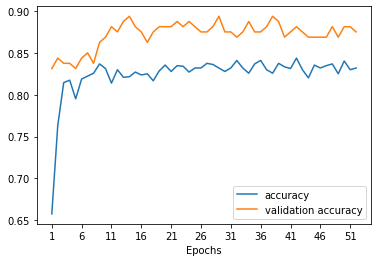

In [401]:
def plot_accuracy(fit, epochs):
    iterations = np.arange(1, epochs+1)
    plt.plot(iterations, fit.history['accuracy'], label='accuracy')
    plt.plot(iterations, fit.history['val_accuracy'],
             label='validation accuracy')
    plt.legend()
    plt.xticks(iterations[::epochs//10])
    plt.xlabel('Epochs')
    plt.show()


plot_accuracy(history_callback, 52) #Depending on number of epochs it runs

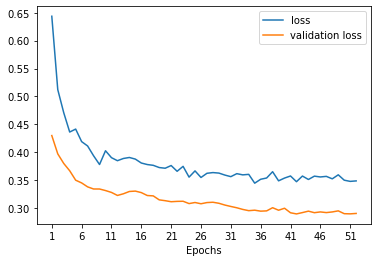

In [402]:
def plot_loss(fit, epochs):
    iterations = np.arange(1, epochs+1)
    plt.plot(iterations, fit.history['loss'], label='loss')
    plt.plot(iterations, fit.history['val_loss'], label='validation loss')
    plt.legend()
    plt.xticks(iterations[::epochs//10])
    plt.xlabel('Epochs')
    plt.show()


plot_loss(history_callback, 52)

In [403]:
pred = modeldeep.predict(X_test)


5/5 [==============================] - 0s 821us/step


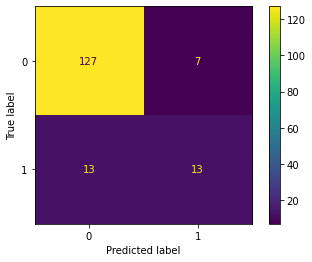

In [404]:
predicted = tensorflow.squeeze(pd.DataFrame(pred))
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(Y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [405]:
# Evaluate the model
accuracydeep = accuracy_score(Y_test, predicted)
f1_scoredeep=f1_score(Y_test, predicted, average='binary')

conf_matrix = confusion_matrix(Y_test, predicted)
classification_rep = classification_report(Y_test, predicted)
print(accuracydeep)
print("F1score:", f1_scoredeep)


0.875
F1score: 0.5652173913043479


In [406]:
print("Classification Report:")
print(classification_report(Y_test, predicted))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       134
         1.0       0.65      0.50      0.57        26

    accuracy                           0.88       160
   macro avg       0.78      0.72      0.75       160
weighted avg       0.87      0.88      0.87       160



# Final result

In [407]:
table = PrettyTable()

table.field_names = ["Model", "Accuracy", "F1 score"]

table.add_row(["Naive Bayes", accurayNaive, f1_scoreNaive])
table.add_row(["KNN",accuracyKNN, f1_scoreKNN])
table.add_row(["Random forest", accuracyRandomF, f1_scoreRandomF])
table.add_row(["Logistic Regression", accuracyLOG, f1_scoreLOG])
table.add_row(["Discriminant analysis", accuracyDisc, f1_scoreDisc])
table.add_row(["Deep learning", accuracydeep, f1_scoredeep])

print(table)

+-----------------------+----------+---------------------+
|         Model         | Accuracy |       F1 score      |
+-----------------------+----------+---------------------+
|      Naive Bayes      |  0.4375  | 0.36619718309859156 |
|          KNN          |  0.8625  |  0.5599999999999999 |
|     Random forest     |  0.9125  |  0.6666666666666667 |
|  Logistic Regression  | 0.83125  | 0.27027027027027023 |
| Discriminant analysis |   0.85   |  0.5862068965517242 |
|     Deep learning     |  0.875   |  0.5652173913043479 |
+-----------------------+----------+---------------------+


# Back to real names

In [ ]:
#Result=[] #Back to real names 
#for i in predicted:
#    if i==0:
#        Result.append('low_bike_demand')
#    else:
#        Result.append('high_bike_demand')